# DEM data by Xarray 

* Explore the DEM data netcdf tiles using xarray open directly

* Related: DEM data by AGDC-V2 API



## Using xarray to open dem netcdf tiles directly

In [1]:
%matplotlib inline
from IPython.display import display
from collections import defaultdict
import matplotlib.pyplot as plt

import numpy as np

import xarray as xr
import xarray.ufuncs

import os,sys

In [2]:
DEM_folder = '/g/data/rs0/tiles/EPSG3577/SRTM_DEM/'
LBG_latlon = (-35.3,149.1)
dem_fname = os.path.join(DEM_folder, 'SRTM_DEM_15_-40_20000221115400000000.nc')


In [3]:
ds2=xarray.open_dataset(dem_fname)
ds2.attrs = {}  # for brevity, hide attributes
print(ds2)

<xarray.Dataset>
Dimensions:         (time: 1, x: 4000, y: 4000)
Coordinates:
  * y               (y) float64 -3.9e+06 -3.9e+06 -3.9e+06 -3.9e+06 -3.9e+06 ...
  * x               (x) float64 1.5e+06 1.5e+06 1.5e+06 1.5e+06 1.5e+06 ...
  * time            (time) datetime64[ns] 2000-02-21T11:54:00
Data variables:
    crs             int32 -2147483647
    elevation       (time, y, x) float32 585.567 586.312 585.325 582.52 ...
    extra_metadata  (time) |S30000 'creation_dt: \'2016-05-04T09:06:54\'\nextent:\n  center_dt: \'2000-02-21T11:54:00\'\n  coord:\n    ll: {lat: -44.000138890272005, lon: 112.99986111}\n    lr: {lat: -44.000138890272005, lon: 153.99986111032797}\n    ul: {lat: -10.00013889, lon: 112.99986111}\n    ur: {lat: -10.00013889, lon: 153.99986111032797}\n  from_dt: \'2000-02-11T17:43:00\'\n  to_dt: \'2000-02-22T23:23:00\'\nformat: {name: ENVI}\ngrid_spatial:\n  projection:\n    geo_ref_points:\n      ll: {x: 112.99986111, y: -44.000138890272005}\n      lr: {x: 153.9998611103

In [4]:
#xray
print(dem_fname)
ds = xr.open_dataset(dem_fname, decode_coords=False)
print(ds)

#ds.attrs = {}  # for brevity, hide attributes

/g/data/rs0/tiles/EPSG3577/SRTM_DEM/SRTM_DEM_15_-40_20000221115400000000.nc
<xarray.Dataset>
Dimensions:         (time: 1, x: 4000, y: 4000)
Coordinates:
  * y               (y) float64 -3.9e+06 -3.9e+06 -3.9e+06 -3.9e+06 -3.9e+06 ...
  * x               (x) float64 1.5e+06 1.5e+06 1.5e+06 1.5e+06 1.5e+06 ...
  * time            (time) datetime64[ns] 2000-02-21T11:54:00
Data variables:
    crs             int32 -2147483647
    elevation       (time, y, x) float32 585.567 586.312 585.325 582.52 ...
    extra_metadata  (time) |S30000 'creation_dt: \'2016-05-04T09:06:54\'\nextent:\n  center_dt: \'2000-02-21T11:54:00\'\n  coord:\n    ll: {lat: -44.000138890272005, lon: 112.99986111}\n    lr: {lat: -44.000138890272005, lon: 153.99986111032797}\n    ul: {lat: -10.00013889, lon: 112.99986111}\n    ur: {lat: -10.00013889, lon: 153.99986111032797}\n  from_dt: \'2000-02-11T17:43:00\'\n  to_dt: \'2000-02-22T23:23:00\'\nformat: {name: ENVI}\ngrid_spatial:\n  projection:\n    geo_ref_points:\n     

In [5]:
# how many megabytes once it's uncompressed?
ds.nbytes * (2 ** -20)

61.12481689453125

In [6]:
%time result=ds.load()

%time  float (ds.elevation.mean())

CPU times: user 10 ms, sys: 44 ms, total: 54 ms
Wall time: 52 ms
CPU times: user 18 ms, sys: 0 ns, total: 18 ms
Wall time: 18.3 ms


771.11962890625

In [7]:
repr(result)
  

'<xarray.Dataset>\nDimensions:         (time: 1, x: 4000, y: 4000)\nCoordinates:\n  * y               (y) float64 -3.9e+06 -3.9e+06 -3.9e+06 -3.9e+06 -3.9e+06 ...\n  * x               (x) float64 1.5e+06 1.5e+06 1.5e+06 1.5e+06 1.5e+06 ...\n  * time            (time) datetime64[ns] 2000-02-21T11:54:00\nData variables:\n    crs             int64 -2147483647\n    elevation       (time, y, x) float32 585.567 586.312 585.325 582.52 ...\n    extra_metadata  (time) |S30000 \'creation_dt: \\\'2016-05-04T09:06:54\\\'\\nextent:\\n  center_dt: \\\'2000-02-21T11:54:00\\\'\\n  coord:\\n    ll: {lat: -44.000138890272005, lon: 112.99986111}\\n    lr: {lat: -44.000138890272005, lon: 153.99986111032797}\\n    ul: {lat: -10.00013889, lon: 112.99986111}\\n    ur: {lat: -10.00013889, lon: 153.99986111032797}\\n  from_dt: \\\'2000-02-11T17:43:00\\\'\\n  to_dt: \\\'2000-02-22T23:23:00\\\'\\nformat: {name: ENVI}\\ngrid_spatial:\\n  projection:\\n    geo_ref_points:\\n      ll: {x: 112.99986111, y: -44.00013

In [8]:
ds['elevation']

<xarray.DataArray 'elevation' (time: 1, y: 4000, x: 4000)>
array([[[  585.56689453,   586.31225586,   585.324646  , ...,
           678.55145264,   682.73895264,   684.91412354],
        [  580.60559082,   580.63104248,   578.89978027, ...,
           680.05548096,   684.38024902,   686.66436768],
        [  576.03149414,   575.44226074,   573.17016602, ...,
           680.87585449,   684.85247803,   687.09368896],
        ..., 
        [ 1321.98962402,  1318.37280273,  1316.72460938, ...,
           769.48370361,   763.20898438,   757.42407227],
        [ 1322.31762695,  1318.7175293 ,  1316.66760254, ...,
           774.11187744,   767.67004395,   761.33508301],
        [ 1321.6829834 ,  1318.49060059,  1316.47021484, ...,
           779.25970459,   773.32147217,   767.14630127]]], dtype=float32)
Coordinates:
  * y        (y) float64 -3.9e+06 -3.9e+06 -3.9e+06 -3.9e+06 -3.9e+06 ...
  * x        (x) float64 1.5e+06 1.5e+06 1.5e+06 1.5e+06 1.5e+06 1.5e+06 ...
  * time     (time) dateti

In [9]:
date_ind = 0
dem_data = ds['elevation'].isel(time=date_ind)  #.values  not needed after load() call above
# B4data = L5data['arrays']['band_4'].isel(time=date_ind).values
# B5data = L5data['arrays']['band_5'].isel(time=date_ind).values

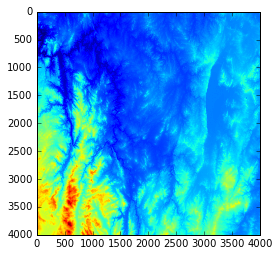

In [10]:
plt.imshow(dem_data)

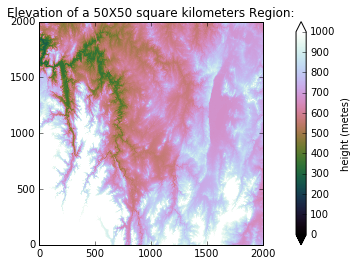

In [11]:
plt.figure(figsize=(12, 4))
plt.imshow(dem_data, cmap='cubehelix', vmin=0, vmax=1000, extent=[0, 2000, 0, 2000], interpolation='nearest')
plt.title('Elevation of a 50X50 square kilometers Region:')
plt.colorbar(label='height (metes)', extend='both');